<a href="https://colab.research.google.com/github/Reet26/Readme/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing required libraries and loading the datasets.**







---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df= pd.read_csv('/content/train.csv')

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979


In [ ]:
df_train_label= pd.read_csv('/content/train_label.csv')
df_train_label

,504
0,5
1,139
2,209
3,184
4,791
...,...
8702,13
8703,11
8704,1
8705,92


In [ ]:
##appending the train_label dataset to train.csv as Total_booking column
col=['Total_booking']
df_train_label= pd.read_csv('/content/train_label.csv',header=None,names=col)
train = df.join(df_train_label)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [ ]:
df_test=pd.read_csv('/content/test.csv')
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [ ]:
df_test_label=pd.read_csv('/content/test_label.csv')
df_test_label

,256
0,87
1,11
2,84
3,668
4,53
...,...
2172,3
2173,144
2174,159
2175,29


In [ ]:
col=['Total_booking']
df_test_label=pd.read_csv('/content/test_label.csv',header=None,names=col)
test=df_test.join(df_test_label)

In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


### **Analyzing the datasets.** 

---


*   Shape of datasets
*   Data types
*   Null values








In [ ]:
train.shape

(8708, 10)

In [ ]:
test.shape

(2178, 10)

In [ ]:
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [ ]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [ ]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


### **Feature Engineering**

---



In [ ]:
from datetime import datetime
import calendar

In [ ]:
##creating new columns

train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"]= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"]= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,1/16/2012,6,Monday,January
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,11/10/2011,1,Thursday,November
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,4/12/2011,3,Tuesday,April
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,11/7/2012,1,Wednesday,November


In [ ]:
train.drop('datetime', axis=1, inplace=True)

In [ ]:
test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"]= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"]= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,3/8/2012,3,Thursday,March
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,1/12/2012,12,Thursday,January
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,3/7/2012,22,Wednesday,March
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,5/12/2011,5,Thursday,May


### **Outliers Analysis**

---



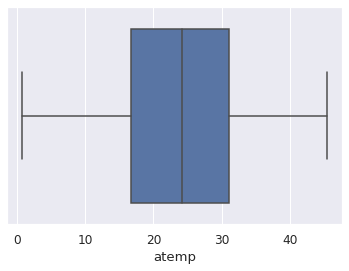

In [ ]:
sns.boxplot(x=train['atemp'])

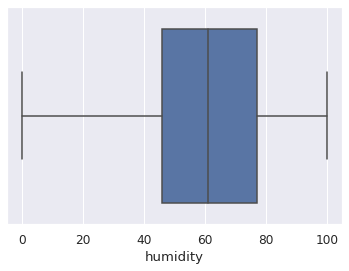

In [ ]:
sns.boxplot(x=train['humidity'])

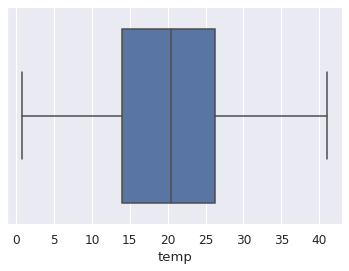

In [ ]:
sns.boxplot(x=train['temp'])

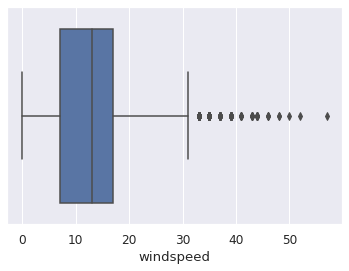

In [ ]:
sns.boxplot(x=train['windspeed'])

In [ ]:
q1=train['windspeed'].quantile(.25)
q3=train['windspeed'].quantile(.75)
IQR = q3-q1
train['windspeed']=np.clip(train['windspeed'],q1- 1.5 * IQR, q3+1.5 *IQR)

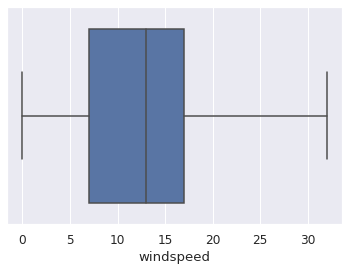

In [ ]:
sns.boxplot(x=train['windspeed'])

### **Correlation** **Analysis**

---



In [ ]:
corr=train.corr()['Total_booking']
corr[np.argsort(corr, axis=0)[::-1]]

Total_booking    1.000000
temp             0.402210
atemp            0.397661
windspeed        0.099736
workingday       0.003846
holiday         -0.002029
humidity        -0.313648
Name: Total_booking, dtype: float64

<function matplotlib.pyplot.show>

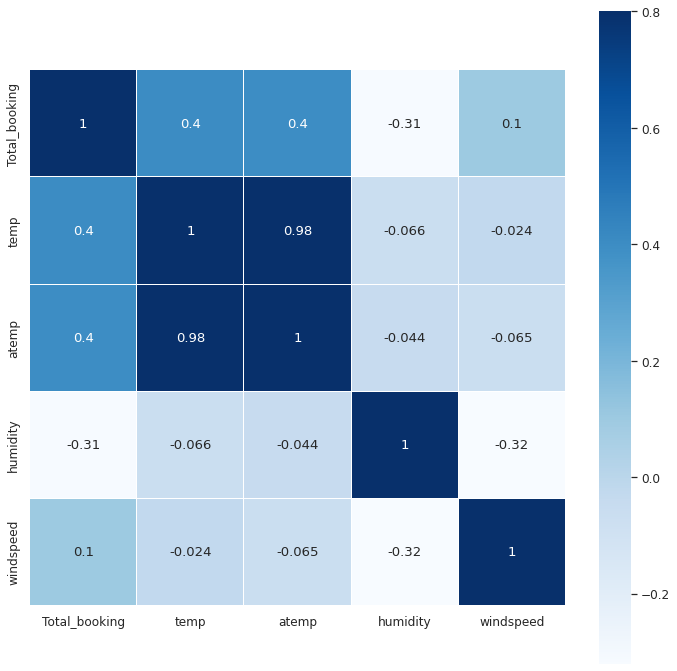

In [ ]:
corrMatrix= train[['Total_booking', 'temp','atemp','humidity', 'windspeed']].corr()
sns.set(font_scale = 1.10)
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix , vmax=.8 ,linewidths=0.01,square=True , annot=True,cmap='Blues', linecolor='white')
plt.show


<function matplotlib.pyplot.show>

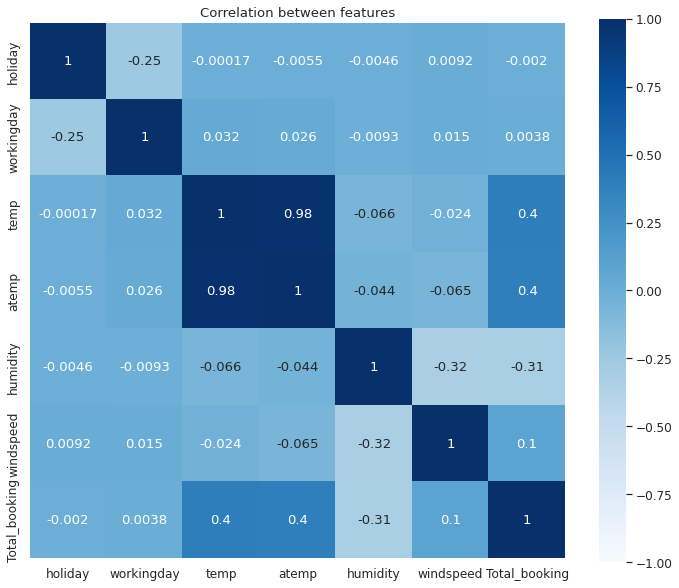

In [ ]:
correlation = train.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap='Blues', annot = True, vmax = 1, square = True,vmin=-1)
plt.title('Correlation between features');
plt.show

temp and atemp are highly correlated

###**Data Visualization**

---


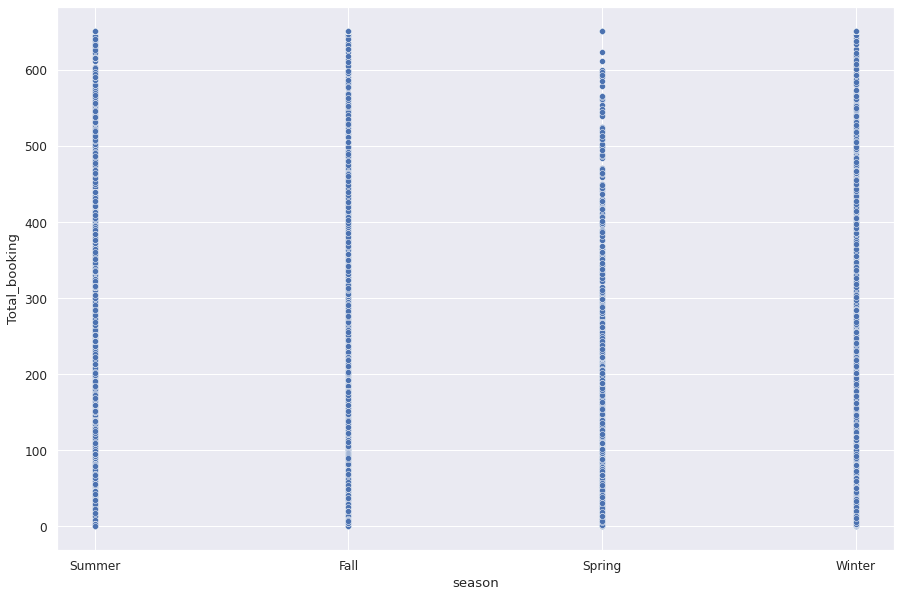

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train ,x='season',y='Total_booking')

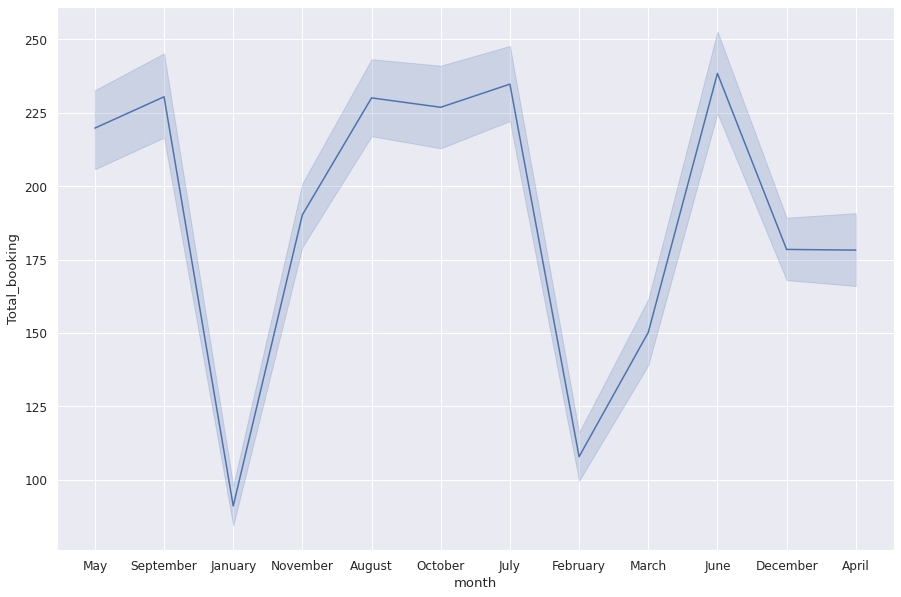

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data=train ,x='month', y='Total_booking')

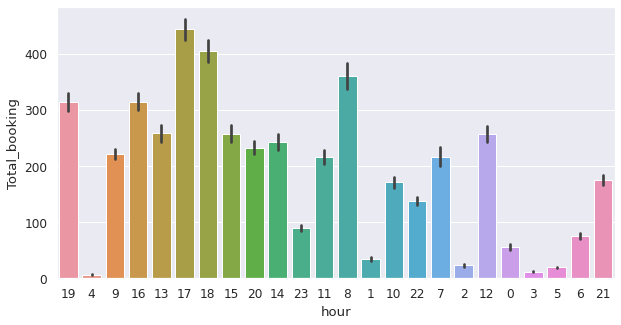

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=train ,x='hour' ,y='Total_booking')

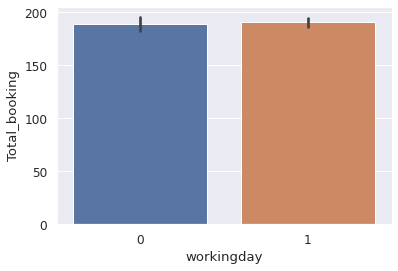

In [ ]:

sns.barplot(data=train ,x='workingday' ,y='Total_booking')

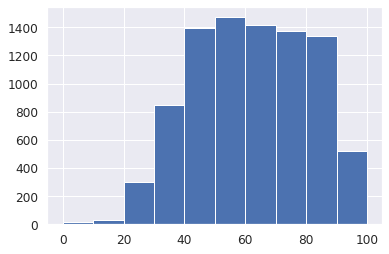

In [ ]:
##histograms
plt.hist(train['humidity'])
plt.show()

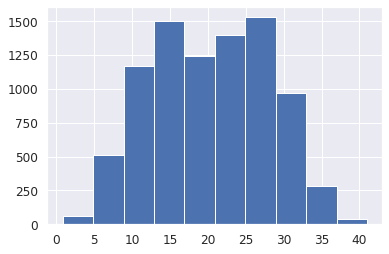

In [ ]:
plt.hist(train['temp'])
plt.show()

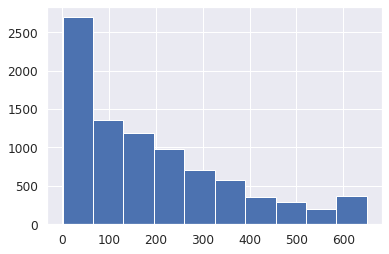

In [ ]:
plt.hist(train['Total_booking'])
plt.show()

### **Converting the categorical data**




---



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
train['weekday']=le.fit_transform(train['weekday'])
train['season']=le.fit_transform(train['season'])
train['month']=le.fit_transform(train['month'])
train['weather']=le.fit_transform(train['weather'])
train['date']=le.fit_transform(train['date'])
train['temp']=le.fit_transform(train['temp'])
train['atemp']=le.fit_transform(train['atemp'])
train['windspeed']=le.fit_transform(train['windspeed'])

In [ ]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,2,0,1,0,26,33,77,7,504.0,289,19,6,8
1,0,0,1,0,34,43,79,8,5.0,447,4,6,11
2,1,0,1,0,6,7,50,10,139.0,8,9,4,4
3,3,0,1,0,16,21,29,3,209.0,94,16,0,9
4,0,0,1,0,36,43,51,8,184.0,426,13,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,1,0,0,4,8,54,1,13.0,15,6,1,4
8704,3,0,1,3,19,26,87,0,11.0,78,1,4,9
8705,2,0,1,3,28,35,56,3,1.0,234,3,5,0
8706,3,0,1,3,13,17,61,7,92.0,109,1,6,9


### **Splitting the datasets for training and testing.**

---



In [ ]:
X = train.drop('Total_booking', axis =1)
y = train['Total_booking']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size =0.2 , random_state = 101)
print(X_train.shape)
print(X_test.shape)

(6966, 12)
(1742, 12)


### **Training models**

---



In [ ]:
RF = RandomForestRegressor( random_state = 0)
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
y_pred_train = RF.predict(X_train)

In [ ]:
SVR = SVR()
SVR.fit(X_train, y_train)
y_pred_SVR = SVR.predict(X_test)

KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)


In [ ]:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
y_pred_BR=BR.predict(X_test)


GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('R squ value for RF:', r2_score(y_test, y_pred_RF))
print('R squ value for SVM:', r2_score(y_test, y_pred_SVR))
print('R squ value for KNN:', r2_score(y_test, y_pred_KNN))
print('R squ value for GB:', r2_score(y_test, y_pred_GB))
print('R squ valur for BR :',r2_score(y_test,y_pred_BR))


R squ value for RF: 0.8662860413967725
R squ value for SVM: 0.058302767226192875
R squ value for KNN: 0.5038414916477967
R squ value for GB: 0.8116532588512231
R squ valur for BR : 0.8486245418827137


In [ ]:
print('MSE for RF:', mean_squared_error(y_test, y_pred_RF))
print('MSE for SVM:', mean_squared_error(y_test, y_pred_SVR))
print('MSE for KNN:', mean_squared_error(y_test, y_pred_KNN))
print('MSE for GB:', mean_squared_error(y_test, y_pred_GB))
print('MSE For BR:', mean_squared_error(y_test,y_pred_BR))

MSE for RF: 4050.529782807119
MSE for SVM: 28526.361253396353
MSE for KNN: 15029.880470723307
MSE for GB: 5705.493222151672
MSE For BR: 4585.540716130885


In [ ]:
RF = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0) 
RF = RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_RF))

R squared: 0.8677071786602193


### **GridSearchCV**

---



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500, 1000, 1200]
}


grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000, 1200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 30, 'n_estimators': 1200}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=30, n_estimators=1200, n_jobs=-1,
                      random_state=0)

In [ ]:
cvrf_grid = grid_search.best_estimator_
#Predict the model
y_pred_clf = cvrf_grid.predict(X_test)
print("R squared value :", r2_score(y_test, y_pred_clf))
print("MSE:", mean_squared_error(y_test, y_pred_clf))

R squared value : 0.8679591299658588
MSE: 3999.847751184172


### **Performing prediction on test set**

---



In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,3/8/2012,3,Thursday,March
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,1/12/2012,12,Thursday,January
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,3/7/2012,22,Wednesday,March
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,5/12/2011,5,Thursday,May


In [ ]:
test.drop('datetime' ,axis=1 ,inplace=True)
test.drop('date', axis=1, inplace= True)

In [ ]:
test.shape

(2178, 12)

In [ ]:
le=LabelEncoder()
test['weekday']=le.fit_transform(test['weekday'])
test['season']=le.fit_transform(test['season'])
test['month']=le.fit_transform(test['month'])
test['weather']=le.fit_transform(test['weather'])
test['temp']=le.fit_transform(test['temp'])
test['atemp']=le.fit_transform(test['atemp'])
test['windspeed']=le.fit_transform(test['windspeed'])

In [ ]:
from sklearn.metrics import mean_squared_log_error , r2_score

In [ ]:
pred = cvrf_grid.predict(test)
print("R square:",r2_score(df_test_label,pred))
print("Mean squ log error  :", mean_squared_log_error(df_test_label,pred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Total_booking
Feature names seen at fit time, yet now missing:
- date

  warnings.warn(message, FutureWarning)


R square: 0.8127544846865435
Mean squ log error  : 0.21260576989229407


In [ ]:
pred = pd.DataFrame(pred)
pred.columns = ['Predictions']
pred

,Predictions
0,196.248333
1,113.055417
2,60.445833
3,77.702500
4,461.552917
...,...
2173,3.420000
2174,77.577500
2175,87.992500
2176,21.716667
